In [79]:
import pandas as pd
import numpy as np
import requests
import json
from config import api_key
import flr_tools
import cme_tools
%matplotlib inline
from matplotlib import pyplot as plt
from datetime import datetime as dt
import scipy.stats as stats

In [2]:
start_date = "2014-01-01"
end_date = "2019-10-19"
#query_flr_url =f"https://api.nasa.gov/DONKI/FLR?startDate={start_date}&endDate={end_date}&api_key={api_key}"

In [3]:
dont_use_nasa_time_format = False
flare_alldf = flr_tools.flare_query_all(start_date, end_date, dont_use_nasa_time_format)
flare_alldf.head()

,class_type,end_time(zulu),flare_id,linked_events,peak_time(zulu),power(w/m^2),start_time(zulu)
0,M9.9,"01/01/2014, 19:03:00",2014-01-01T18:40:00-FLR-001,[None Found.],"01/01/2014, 18:52:00",0.000099,"01/01/2014, 18:40:00"
1,M1.7,"01/02/2014, 02:56:00",2014-01-02T02:24:00-FLR-001,[None Found.],"01/02/2014, 02:33:00",0.000017,"01/02/2014, 02:24:00"
2,M1.2,"01/02/2014, 22:22:00",2014-01-02T22:12:00-FLR-001,[None Found.],"01/02/2014, 22:18:00",0.000012,"01/02/2014, 22:12:00"
3,M1.0,"01/03/2014, 12:54:00",2014-01-03T12:41:00-FLR-001,[None Found.],"01/03/2014, 12:50:00",0.000010,"01/03/2014, 12:41:00"
4,M1.1,"01/03/2014, 21:40:00",2014-01-03T21:00:00-FLR-001,[None Found.],"01/03/2014, 21:14:00",0.000011,"01/03/2014, 21:00:00"


In [4]:
dont_use_nasa_time_format = False
cme_alldf = cme_tools.cme_query_all(start_date, end_date, dont_use_nasa_time_format)
cme_alldf.head()

,cme_id,speed,type,linked_events,start time
0,2014-01-01T14:36:00-CME-001,531,C,None,"01/01/2014, 14:36:00"
1,2014-01-03T03:24:00-CME-001,NA,NA,None,"01/03/2014, 03:24:00"
2,2014-01-04T21:25:00-CME-001,750,C,[{'activityID': '2014-01-04T18:47:00-FLR-001'}...,"01/04/2014, 21:25:00"
3,2014-01-05T00:54:00-CME-001,650,C,[{'activityID': '2014-01-04T22:12:00-FLR-001'}],"01/05/2014, 00:54:00"
4,2014-01-05T09:24:00-CME-001,296,S,None,"01/05/2014, 09:24:00"


In [5]:
use_nasa_time = True
flare_smalldf = flr_tools.flare_query_small(start_date, end_date, use_nasa_time)
flare_smalldf

,class_type,flare_id,peak_time(zulu),power(w/m^2)
0,M9.9,2014-01-01T18:40:00-FLR-001,2014-01-01T18:52Z,9.900000e-05
1,M1.7,2014-01-02T02:24:00-FLR-001,2014-01-02T02:33Z,1.700000e-05
2,M1.2,2014-01-02T22:12:00-FLR-001,2014-01-02T22:18Z,1.200000e-05
3,M1.0,2014-01-03T12:41:00-FLR-001,2014-01-03T12:50Z,1.000000e-05
4,M1.1,2014-01-03T21:00:00-FLR-001,2014-01-03T21:14Z,1.100000e-05
5,M1.3,2014-01-04T10:16:00-FLR-001,2014-01-04T10:25Z,1.300000e-05
6,M4.0,2014-01-04T18:47:00-FLR-001,2014-01-04T19:46Z,4.000000e-05
7,M1.9,2014-01-04T22:12:00-FLR-001,2014-01-04T22:52Z,1.900000e-05
8,M1.0,2014-01-07T03:49:00-FLR-001,2014-01-07T03:53Z,1.000000e-05
9,M7.2,2014-01-07T10:07:00-FLR-001,2014-01-07T10:13Z,7.200000e-05


In [6]:
query_cme_url =f"https://kauai.ccmc.gsfc.nasa.gov/DONKI/WS/get/CME?startDate={start_date}&endDate={end_date}"
cme_request = requests.get(query_cme_url).json()

In [7]:
cme_request

[{'activityID': '2014-01-01T14:36:00-CME-001',
  'startTime': '2014-01-01T14:36Z',
  'sourceLocation': '',
  'activeRegionNum': None,
  'instruments': [{'id': 1, 'displayName': 'SOHO: LASCO/C2'},
   {'id': 2, 'displayName': 'SOHO: LASCO/C3'},
   {'id': 5, 'displayName': 'STEREO A: SECCHI/COR2'},
   {'id': 7, 'displayName': 'STEREO B: SECCHI/COR2'}],
  'cmeAnalyses': [{'time21_5': '2014-01-01T23:02Z',
    'latitude': -55.0,
    'longitude': -85.0,
    'halfAngle': 28.0,
    'speed': 531.0,
    'type': 'C',
    'isMostAccurate': True,
    'note': '',
    'levelOfData': 0,
    'enlilList': [{'modelCompletionTime': '2014-01-01T22:50Z',
      'au': 2.0,
      'estimatedShockArrivalTime': None,
      'estimatedDuration': None,
      'rmin_re': None,
      'kp_18': None,
      'kp_90': None,
      'kp_135': None,
      'kp_180': None,
      'isEarthGB': False,
      'impactList': None,
      'cmeIDs': ['2014-01-01T14:36:00-CME-001']}]}],
  'linkedEvents': None,
  'note': '',
  'catalog': 'SWR

In [8]:
cme_analysis_data = flr_tools.cme_analysis_df(cme_request)
cme_analysis_data

,activity_id,data_level,half_angle,is_most_accurate,lat,long,note,speed,time21_5,type
0,2014-01-01T14:36:00-CME-001,0,28,True,-55,-85,,531,2014-01-01T23:02Z,C
1,2014-01-03T03:24:00-CME-001,no data,no data,False,no data,no data,no data,no data,no data,no data
2,2014-01-04T21:25:00-CME-001,0,46,True,-35,5,remeasured,750,2014-01-04T23:40Z,C
3,2014-01-05T00:54:00-CME-001,0,40,True,11,96,remeasured,650,2014-01-05T04:52Z,C
4,2014-01-05T09:24:00-CME-001,0,20,True,23,-130,,296,2014-01-05T21:34Z,S
5,2014-01-06T08:09:00-CME-001,0,45,True,-3,102,"remeasured. Associated with GLE, see Thakur e...",1275,2014-01-06T10:43Z,O
6,2014-01-07T01:24:00-CME-001,0,30,False,33,64,,450,2014-01-07T08:33Z,S
7,2014-01-07T03:48:00-CME-001,0,49,True,-55,117,,620,2014-01-07T09:45Z,C
8,2014-01-07T18:24:00-CME-001,0,49,True,-24,30,"remeasured. GCS major half width=49, minor hal...",2061,2014-01-07T19:48Z,R
9,2014-01-08T04:12:00-CME-001,0,13,True,30,93,,472,2014-01-08T11:19Z,S


In [9]:
flare_cme_combo_test = flr_tools.cme_compare(start_date, end_date)

In [10]:
flare_cme_combo_test

,activity_id,class_type,data_level,end_time(zulu),flare_id,half_angle,is_most_accurate,lat,linked_events,long,note,peak_time(zulu),power(w/m^2),speed,start_time(zulu),time21_5,type
0,2014-01-04T21:25:00-CME-001,M4.0,0,"01/04/2014, 20:23:00",2014-01-04T18:47:00-FLR-001,46,True,-35,2014-01-04T21:25:00-CME-001,5,remeasured,"01/04/2014, 19:46:00",4.000000e-05,750,"01/04/2014, 18:47:00",2014-01-04T23:40Z,C
1,2014-01-05T00:54:00-CME-001,M1.9,0,"01/04/2014, 23:22:00",2014-01-04T22:12:00-FLR-001,40,True,11,2014-01-05T00:54:00-CME-001,96,remeasured,"01/04/2014, 22:52:00",1.900000e-05,650,"01/04/2014, 22:12:00",2014-01-05T04:52Z,C
2,2014-01-07T18:24:00-CME-001,X1.2,0,"01/07/2014, 18:58:00",2014-01-07T18:02:00-FLR-001,49,True,-24,2014-01-07T18:24:00-CME-001,30,"remeasured. GCS major half width=49, minor hal...","01/07/2014, 18:32:00",1.200000e-04,2061,"01/07/2014, 18:02:00",2014-01-07T19:48Z,R
3,2014-01-08T04:12:00-CME-001,M3.6,0,"01/08/2014, 03:54:00",2014-01-08T03:39:00-FLR-001,13,True,30,2014-01-08T04:12:00-CME-001,93,,"01/08/2014, 03:47:00",3.600000e-05,472,"01/08/2014, 03:39:00",2014-01-08T11:19Z,S
4,2014-01-27T02:24:00-CME-001,M1.0,0,"01/27/2014, 01:39:00",2014-01-27T01:05:00-FLR-001,20,True,21,2014-01-27T02:24:00-CME-001,-83,,"01/27/2014, 01:21:00",1.000000e-05,700,"01/27/2014, 01:05:00",2014-01-27T06:46Z,C
5,2014-01-27T02:24:00-CME-001,M1.1,0,"01/27/2014, 02:18:00",2014-01-27T02:02:00-FLR-001,20,True,21,2014-01-27T02:24:00-CME-001,-83,,"01/27/2014, 02:10:00",1.100000e-05,700,"01/27/2014, 02:02:00",2014-01-27T06:46Z,C
6,2014-01-30T08:36:00-CME-001,M1.1,0,"01/30/2014, 08:41:00",2014-01-30T07:54:00-FLR-001,45,True,-17,2014-01-30T08:36:00-CME-001,-61,,"01/30/2014, 08:11:00",1.100000e-05,472,"01/30/2014, 07:54:00",2014-01-30T15:45Z,S
7,2014-01-30T16:24:00-CME-001,M6.6,0,"01/30/2014, 16:28:00",2014-01-30T15:48:00-FLR-001,58,True,-15,2014-01-30T16:24:00-CME-001,-63,"Yaris measurements,POS","01/30/2014, 16:11:00",6.600000e-05,998,"01/30/2014, 15:48:00",2014-01-30T19:29Z,C
8,2014-02-09T16:12:00-CME-001,M1.0,0,"02/09/2014, 16:52:00",2014-02-09T15:40:00-FLR-001,49,True,-16,2014-02-09T16:12:00-CME-001,-108,,"02/09/2014, 16:14:00",1.000000e-05,715,"02/09/2014, 15:40:00",2014-02-09T20:56Z,C
9,2014-02-11T05:24:00-CME-001,M1.7,0,"02/11/2014, 03:39:00",2014-02-11T03:22:00-FLR-001,32,True,2,2014-02-11T05:24:00-CME-001,-8,,"02/11/2014, 03:31:00",1.700000e-05,488,"02/11/2014, 03:22:00",2014-02-11T15:08Z,S


In [11]:
len(flare_cme_combo_test)

134

In [12]:
cme_ids = cme_tools.linked_events(flare_alldf.rename(columns={'flare_id':'id'}),'CME')
flr_ids = cme_tools.linked_events(cme_alldf.rename(columns={'cme_id':'id'}),'FLR')
both = pd.DataFrame(cme_ids, columns=['flare_id','cme_id'])
new_df = both.merge(cme_alldf[["cme_id","speed","type","start time"]], on="cme_id", how='left')
new_df = new_df.rename(columns={"speed":"cme speed","type": "cme type", "start time": "cme start time"})
full_df = new_df.merge(flare_alldf[["flare_id","start_time(zulu)","peak_time(zulu)","end_time(zulu)","class_type","power(w/m^2)"]],
                      on="flare_id", how="left")
full_df = full_df.rename(columns={"start_time(zulu)":"flare start time","peak_time(zulu)": "flare peak time",
                                  "end_time(zulu)":"flare end time","class_type":"flare type","power(w/m^2)":"flare power(w/m^)"})
full_df.head()

,flare_id,cme_id,cme speed,cme type,cme start time,flare start time,flare peak time,flare end time,flare type,flare power(w/m^)
0,2014-01-04T18:47:00-FLR-001,2014-01-04T21:25:00-CME-001,750,C,"01/04/2014, 21:25:00","01/04/2014, 18:47:00","01/04/2014, 19:46:00","01/04/2014, 20:23:00",M4.0,0.000040
1,2014-01-04T22:12:00-FLR-001,2014-01-05T00:54:00-CME-001,650,C,"01/05/2014, 00:54:00","01/04/2014, 22:12:00","01/04/2014, 22:52:00","01/04/2014, 23:22:00",M1.9,0.000019
2,2014-01-07T18:02:00-FLR-001,2014-01-07T18:24:00-CME-001,2061,R,"01/07/2014, 18:24:00","01/07/2014, 18:02:00","01/07/2014, 18:32:00","01/07/2014, 18:58:00",X1.2,0.000120
3,2014-01-08T03:39:00-FLR-001,2014-01-08T04:12:00-CME-001,472,S,"01/08/2014, 04:12:00","01/08/2014, 03:39:00","01/08/2014, 03:47:00","01/08/2014, 03:54:00",M3.6,0.000036
4,2014-01-27T01:05:00-FLR-001,2014-01-27T02:24:00-CME-001,700,C,"01/27/2014, 02:24:00","01/27/2014, 01:05:00","01/27/2014, 01:21:00","01/27/2014, 01:39:00",M1.0,0.000010


In [62]:
months_CME = []
months_SF = []

dates_CME = cme_alldf['start time']
dates_SF = flare_alldf['start_time(zulu)']

for date in dates_CME:
    months_CME.append(dt.strptime(date, '%m/%d/%Y, %H:%M:%S').strftime("%y-%m"))
    
for date in dates_SF:
    months_SF.append(dt.strptime(date, '%m/%d/%Y, %H:%M:%S').strftime("%y-%m"))    #"%Y-%m-01"

    
dates_CME = []
dates_SF = []
counts_CME = []
counts_SF = []

In [63]:
unique_months_CME = []
unique_months_SF = []

for month in months_CME:
    if month not in unique_months_CME:
        unique_months_CME.append(month)
        
for month in months_SF:
    if month not in unique_months_SF:
        unique_months_SF.append(month)

In [64]:
count_CME = []
count_SF = []

for month in unique_months_CME:
    count_CME.append(months_CME.count(month))
    
for month in unique_months_SF:
    count_SF.append(months_SF.count(month))

In [65]:
CME_dict = {'Month': unique_months_CME,
           'CME Count': count_CME}

SF_dict = {'Month': unique_months_SF,
          'SF Count': count_SF}

CME_count_df = pd.DataFrame(CME_dict)
SF_count_df = pd.DataFrame(SF_dict)

combined_count_df = pd.merge(left=CME_count_df, right=SF_count_df, how='outer')

combined_count_df.fillna(0, inplace=True) 

combined_count_df['SF Count'] = combined_count_df['SF Count'].astype(int)

#try to reformat Month to 14-2 style for chart, or somehow show by year

combined_count_df.head()

,Month,CME Count,SF Count
0,14-01,62,26
1,14-02,76,37
2,14-03,76,18
3,14-04,65,5
4,14-05,72,5


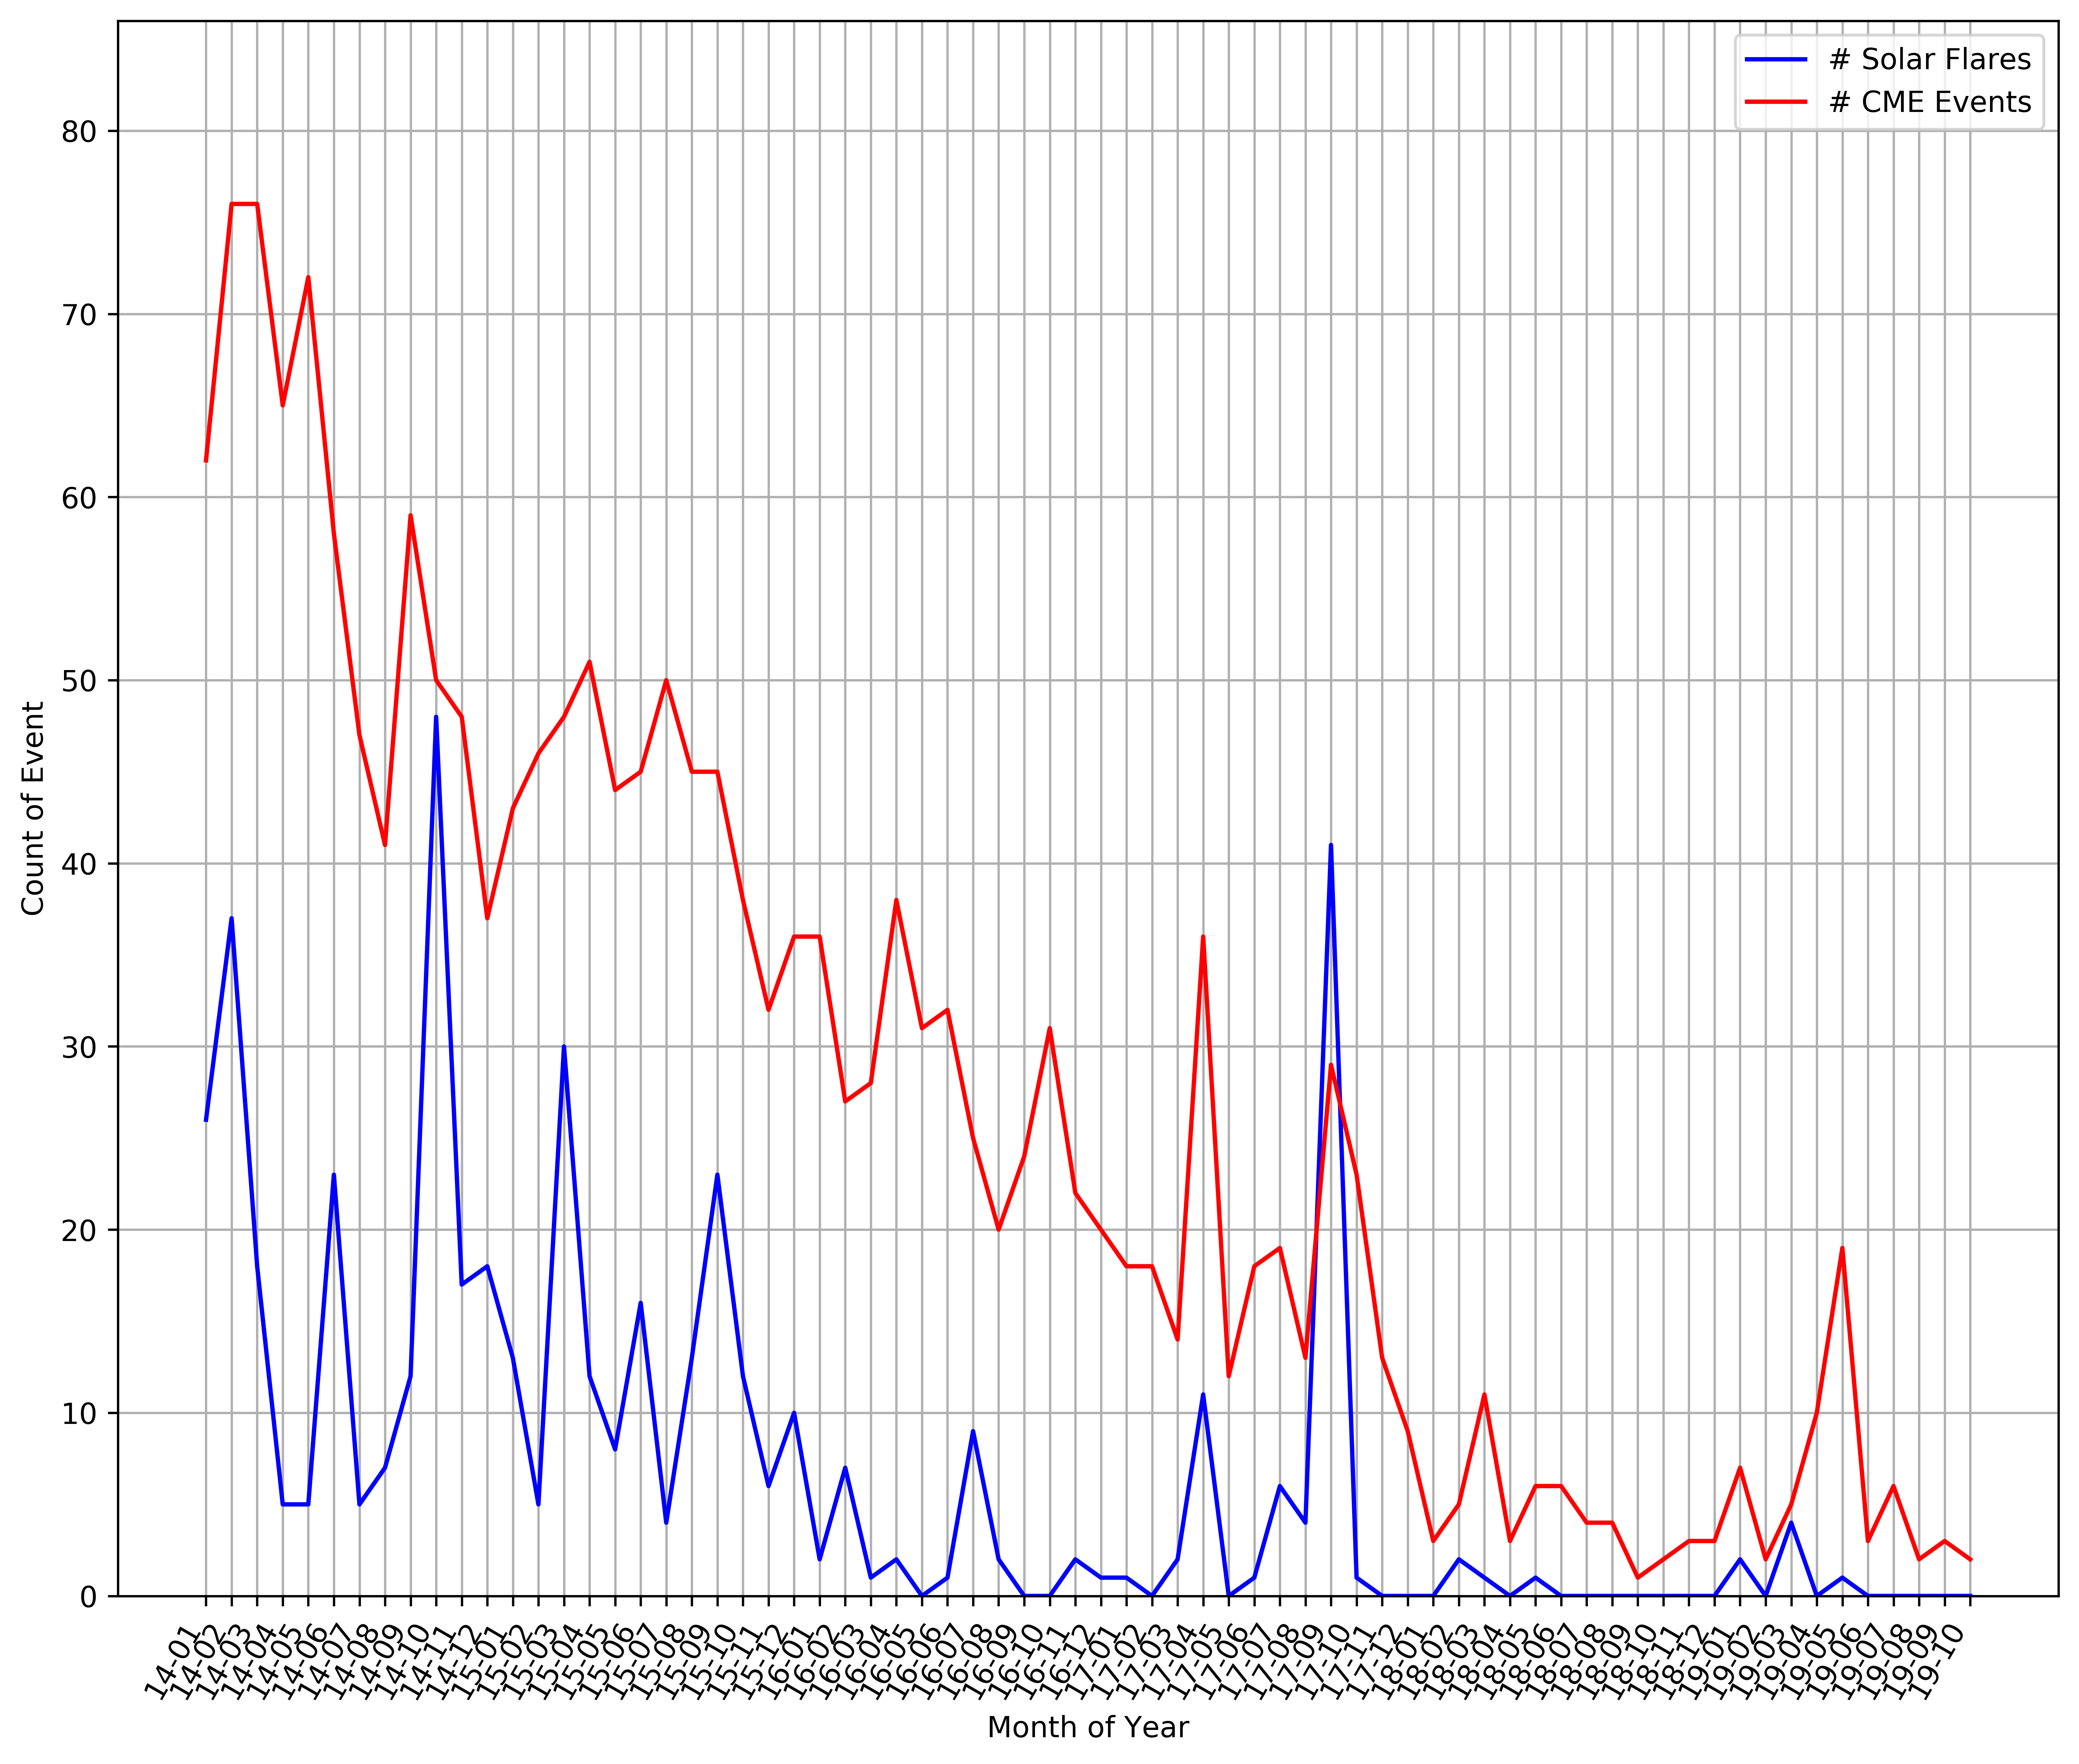

In [78]:
solar_flare_count, = plt.plot(combined_count_df['Month'], combined_count_df['SF Count'], color='blue', label='# Solar Flares')
cme_count, = plt.plot(combined_count_df['Month'], combined_count_df['CME Count'], color='red', label='# CME Events')
plt.legend(handles=[solar_flare_count, cme_count], loc="best")
plt.rcParams['figure.figsize'] = (12,10)
plt.rcParams['axes.grid'] = True
plt.xlabel("Month of Year")
plt.ylabel("Count of Event")
plt.xticks(rotation=60, horizontalalignment='right')
plt.ylim(0, max(combined_count_df['CME Count'] + 10))
plt.show()

In [80]:
combined_count_df.corr()


,CME Count,SF Count
CME Count,1.000000,0.638457
SF Count,0.638457,1.000000
